# Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
import warnings
warnings.filterwarnings('ignore')

# importing Dataset File

In [2]:
df=pd.read_csv("Walmart_sales.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.shape

(6435, 8)

In [4]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

# Data Exploaration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# Finding Null Values

In [6]:
df.isnull().sum()   #There is no Null values contains in Walmart Sales Dataset

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


# Finding Corrleation

In [8]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


<AxesSubplot:>

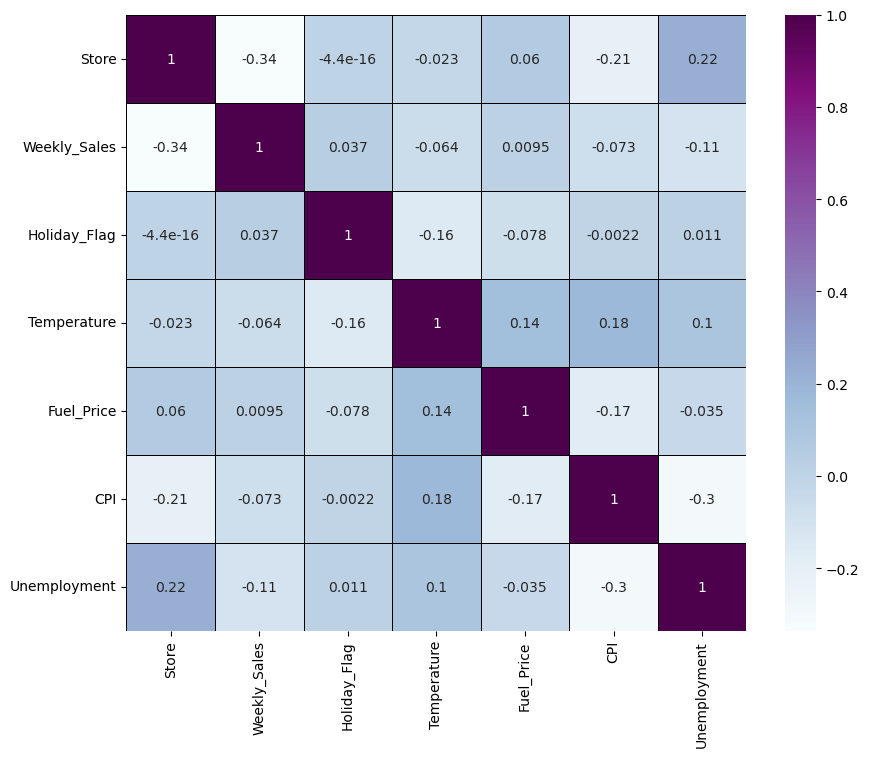

In [9]:
plt.figure(figsize=(10,8))
sb.heatmap(df.corr(),annot=True,linecolor='k',linewidths=.6,cmap='BuPu')

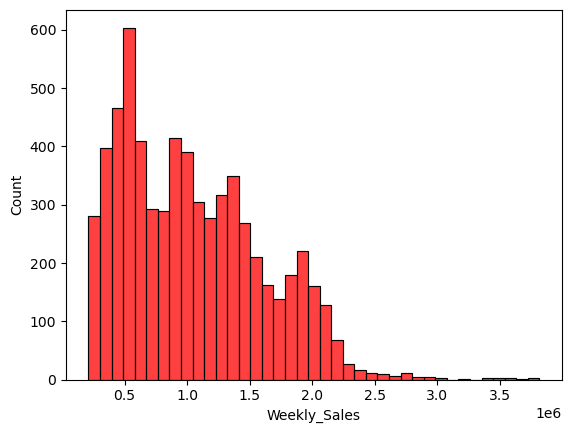

In [13]:
sb.histplot(df['Weekly_Sales'],color='r');

In [11]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

In [12]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


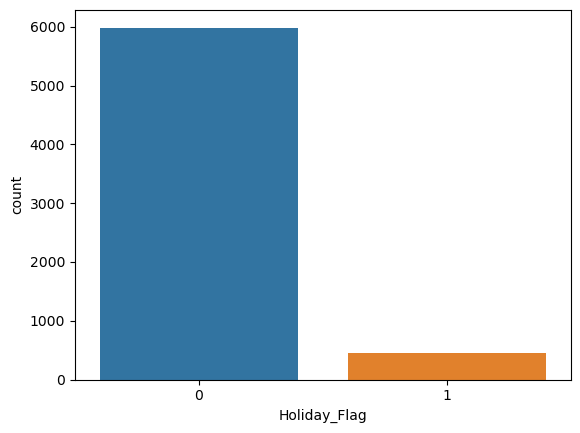

In [15]:
sb.countplot(df['Holiday_Flag']);

<AxesSubplot:xlabel='Unemployment', ylabel='Count'>

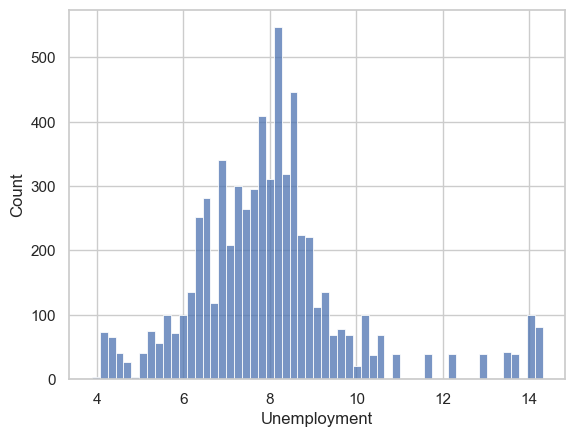

In [84]:
sb.histplot(data=df,x=df['Unemployment'])

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

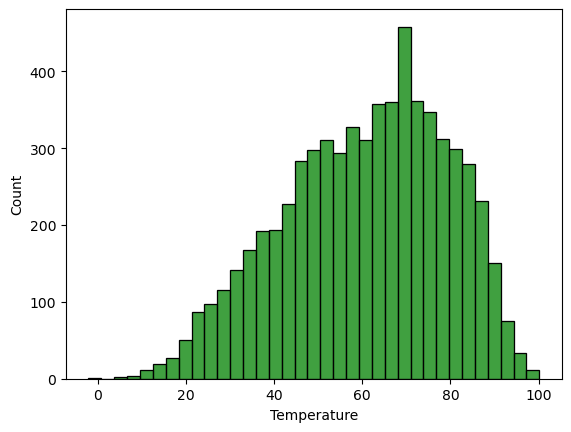

In [16]:
sb.histplot(data=df,x=df['Temperature'],color='g')

# Label Encoder()

In [14]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()
df['Date']=df['Date']=a.fit_transform(df['Date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   int32  
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int32(1), int64(2)
memory usage: 377.2 KB


# Model Building

In [17]:
x=df.drop(columns='Weekly_Sales',axis=1)
y=df['Weekly_Sales']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=7)


In [21]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df1=pd.DataFrame(scale.fit_transform(df),columns=df.columns)
df1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,-1.693979,-1.259704,1.057420,-0.274204,-0.995136,-1.713800,1.004175,0.056964
1,-1.693979,-0.460277,1.054348,3.646917,-1.201170,-1.766089,1.007880,0.056964
2,-1.693979,0.339151,1.001206,-0.274204,-1.124178,-1.840166,1.009074,0.056964
3,-1.693979,1.138579,0.642828,-0.274204,-0.760907,-1.737766,1.009849,0.056964
4,-1.693979,-1.235479,0.899914,-0.274204,-0.767955,-1.598328,1.010624,0.056964


In [33]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
model=RF.score(x_train,y_train)
model

0.9907425541138489

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor 

# Importing the models of Cross-Validation

In [41]:
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,RepeatedStratifiedKFold  #for finding the scores of cross-validations

In [42]:
model_LR=LinearRegression()
model_SVR=SVR()
model_KNN=KNeighborsRegressor()
model_DT=DecisionTreeRegressor()
model_ADA=AdaBoostRegressor()
model_GRA=GradientBoostingRegressor()

In [43]:
model=[model_LR,model_SVR,model_KNN,model_DT,model_ADA,model_GRA]
LR,S,K,D,A,GR=[],[],[],[],[],[]
splits=[1,3,5,7,9,11]
for i in splits:
    cv=KFold(n_splits=8,shuffle=True,random_state=42)
    for j in model:
        score=cross_val_score(j,x_train,y_train,cv=cv,n_jobs=-1)
        if j==model_LR:
            LR.append(score.mean())
        elif j==model_SVR:
            S.append(score.mean())
        elif j==model_KNN:
            K.append(score.mean())
        elif j==model_DT:
            D.append(score.mean())
        elif j==model_ADA:
            A.append(score.mean())
        elif j==model_GRA:
            GR.append(score.mean())          

In [44]:
pd.DataFrame({'n:splits':splits,'LinearRegression':LR,'SVR':S,'KNeighborsRegressor':K,'DecisionTreeRegressor':D,'AdaBoostRegressor':A,'GradientBoostingRegressor':GR})


,n:splits,LinearRegression,SVR,KNeighborsRegressor,DecisionTreeRegressor,AdaBoostRegressor,GradientBoostingRegressor
0,1,0.141403,-0.024278,0.239945,0.875368,0.366794,0.886832
1,3,0.141403,-0.024278,0.239945,0.878468,0.379983,0.886835
2,5,0.141403,-0.024278,0.239945,0.878001,0.362716,0.886835
3,7,0.141403,-0.024278,0.239945,0.873732,0.368304,0.886835
4,9,0.141403,-0.024278,0.239945,0.878766,0.355155,0.886836
5,11,0.141403,-0.024278,0.239945,0.872721,0.371490,0.886832


The Ramdom_Forest is getting high accuracy(0.99) as compare to other models.

In [46]:
RF.fit(x_train,y_train)

RandomForestRegressor()

# Predicting the values.

In [48]:
y_pred=RF.predict(x_test)
y_pred

array([1264056.923 , 1401742.986 , 1632582.778 , ...,  247678.7617,
       1562488.0787, 1712834.327 ])

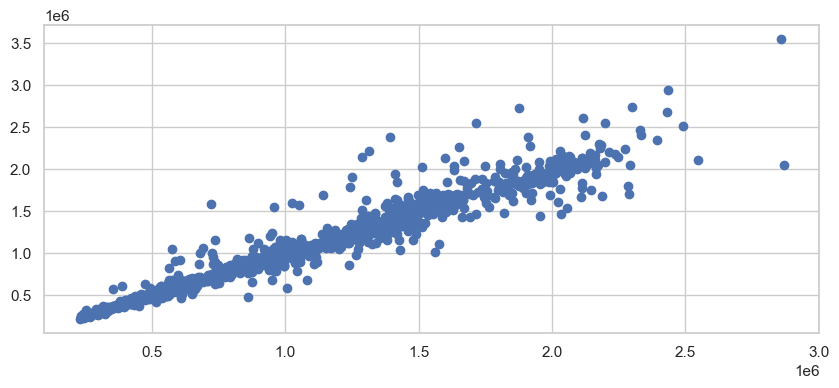

In [49]:
#prediction
plt.figure(figsize=(10,4))
plt.scatter(y_pred,y_test);

# Model Evulation.

In [50]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,y_pred)
MSE

18078491857.45918

In [51]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test,y_pred)
MAE

71281.64174864022

In [52]:
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(y_test,y_pred,squared=False)
RMSE

134456.28232797148

In [53]:
print('R_square',RF.score(x_train,y_train))
print('MSE',MSE)
print('MAE',MAE)
print('RMSE',RMSE)

R_square 0.9908346430579542
MSE 18078491857.45918
MAE 71281.64174864022
RMSE 134456.28232797148


The Model Evaluation of MSE,MAE,RMSE the low values are Good.